In [1]:
#importing libraries of python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#uploading and reading scv file
url ="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)


In [3]:
df.shape
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
#checking if any value is null
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

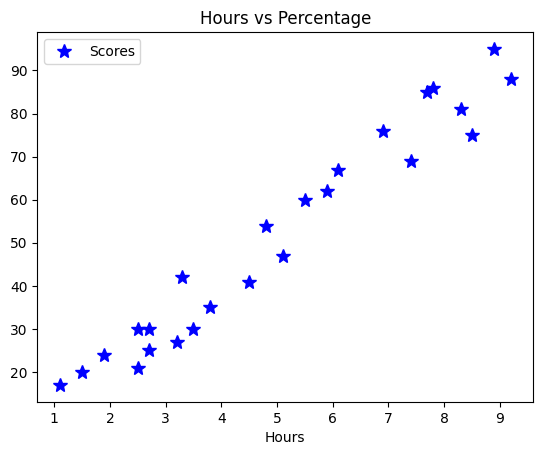

In [8]:
#vistualization
df.plot(x='Hours',y='Scores',color='Blue',style='*',markersize=10)
plt.title('Hours vs Percentage')
plt.xlable('Hours studied')
plt.ylable('Percentage Score')
plt.grid()
plt.show() 

In [9]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [10]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [11]:
 x=df.iloc[: , :1].values
 y=df.iloc[: , 1:].values

In [12]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [13]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [14]:
#model building
from sklearn.model_selection import train_test_split
x_train , x_test, y_train , y_test = train_test_split(x,y, test_size= 0.2, random_state=50)

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

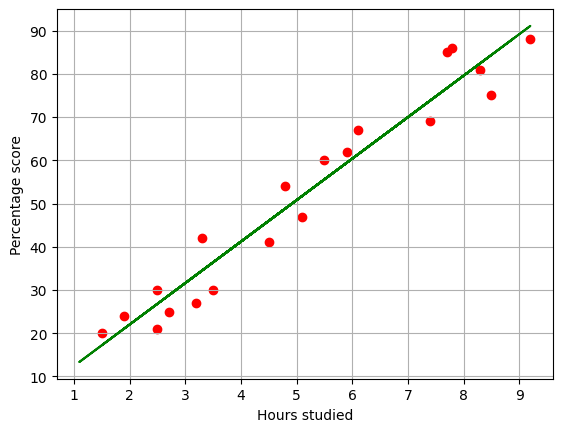

In [16]:
m= model.coef_
c= model.intercept_
line=m*x+c
plt.scatter(x_train , y_train , color = 'red')
plt.plot(x , line, color='green')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.grid()
plt.show()

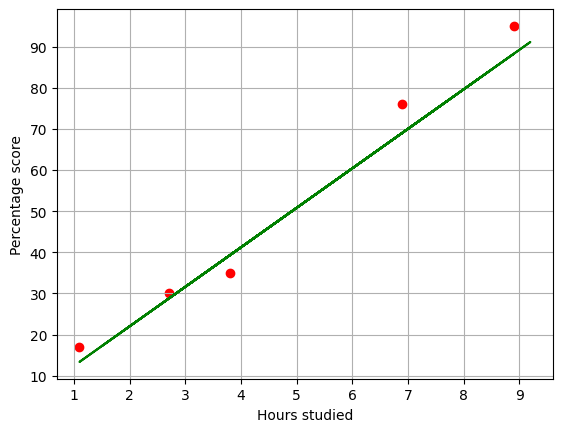

In [17]:
m= model.coef_
c= model.intercept_
line=m*x+c
plt.scatter(x_test , y_test , color = 'red')
plt.plot(x , line, color='green')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.grid()
plt.show()

In [18]:
print(x_test)
y_pred = model.predict(x_test)

[[8.9]
 [2.7]
 [6.9]
 [3.8]
 [1.1]]


In [19]:
y_test

array([[95],
       [30],
       [76],
       [35],
       [17]], dtype=int64)

In [20]:
y_pred

array([[88.21139357],
       [28.71845267],
       [69.02012231],
       [39.27365186],
       [13.36543566]])

In [21]:
#compairing actual vs predicted
comp = pd.DataFrame({'Actual':[y_test],'Predicted':[y_pred]})
comp

,Actual,Predicted
0,"[[95], [30], [76], [35], [17]]","[[88.21139357388518], [28.71845266505782], [69..."


In [22]:
#testing with own data
Hours = 9.25
own_pred = model.predict([[Hours]])
print('the predicted score if a person studies for', Hours,'hours is', own_pred[0])

the predicted score if a person studies for 9.25 hours is [91.56986604]


In [23]:
#evaluating the model

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.5916495300630285
